<a href="https://colab.research.google.com/github/AichaELMouta/Car_Price_Prediction/blob/main/car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("zafarali27/car-price-prediction")

print("Path to dataset files:", path)


Using Colab cache for faster access to the 'car-price-prediction' dataset.
Path to dataset files: /kaggle/input/car-price-prediction


In [ ]:
    from google.colab import drive
    drive.mount('/content/drive')

Mounted at /content/drive


Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
#import all regression models to comparing metric values
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import ElasticNet
from sklearn import metrics

Loading Dataset from csv file to pandas dataframe

In [2]:
car_data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/car_price_prediction_.csv")

In [ ]:
#Inspecting data
car_data.head()

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,1,Tesla,2016,2.3,Petrol,Manual,114832,New,26613.92,Model X
1,2,BMW,2018,4.4,Electric,Manual,143190,Used,14679.61,5 Series
2,3,Audi,2013,4.5,Electric,Manual,181601,New,44402.61,A4
3,4,Tesla,2011,4.1,Diesel,Automatic,68682,New,86374.33,Model Y
4,5,Ford,2009,2.6,Diesel,Manual,223009,Like New,73577.10,Mustang


In [3]:
car_data.shape

(2500, 10)

In [ ]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Car ID        2500 non-null   int64  
 1   Brand         2500 non-null   object 
 2   Year          2500 non-null   int64  
 3   Engine Size   2500 non-null   float64
 4   Fuel Type     2500 non-null   object 
 5   Transmission  2500 non-null   object 
 6   Mileage       2500 non-null   int64  
 7   Condition     2500 non-null   object 
 8   Price         2500 non-null   float64
 9   Model         2500 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 195.4+ KB


In [4]:
car_data.isnull().sum()

,0
Car ID,0
Brand,0
Year,0
Engine Size,0
Fuel Type,0
Transmission,0
Mileage,0
Condition,0
Price,0
Model,0


In [5]:
car_data.duplicated().sum()

np.int64(0)

In [7]:
car_data.rename(columns={"Fuel Type":"Fuel_Type"}, inplace=True)

In [9]:
car_data.rename(columns={"Engine Size":"Engine_size"}, inplace=True)

In [10]:
car_data.columns

Index(['Car ID', 'Brand', 'Year', 'Engine_size', 'Fuel_Type', 'Transmission',
       'Mileage', 'Condition', 'Price', 'Model'],
      dtype='object')

In [11]:
car_data.Brand.value_counts()

,count
Brand,
Toyota,374
Audi,368
BMW,358
Mercedes,353
Honda,352
Tesla,348
Ford,347


In [ ]:
#checking the categorical data
print(car_data.Fuel_Type.value_counts())
print(car_data.Transmission.value_counts())
print(car_data.Condition.value_counts())
print(car_data.Brand.value_counts())

Fuel_Type
Diesel      655
Petrol      630
Electric    614
Hybrid      601
Name: count, dtype: int64
Transmission
Manual       1308
Automatic    1192
Name: count, dtype: int64
Condition
Used        855
Like New    836
New         809
Name: count, dtype: int64
Brand
Toyota      374
Audi        368
BMW         358
Mercedes    353
Honda       352
Tesla       348
Ford        347
Name: count, dtype: int64


Data Analysis and Visualization

In [12]:
# statistical measures of the dataset
car_data.describe()

,Car ID,Year,Engine_size,Mileage,Price
count,2500.00000,2500.0000,2500.000000,2500.000000,2500.000000
mean,1250.50000,2011.6268,3.465240,149749.844800,52638.022532
std,721.83216,6.9917,1.432053,87919.952034,27295.833455
min,1.00000,2000.0000,1.000000,15.000000,5011.270000
25%,625.75000,2005.0000,2.200000,71831.500000,28908.485000
50%,1250.50000,2012.0000,3.400000,149085.000000,53485.240000
75%,1875.25000,2018.0000,4.700000,225990.500000,75838.532500
max,2500.00000,2023.0000,6.000000,299967.000000,99982.590000


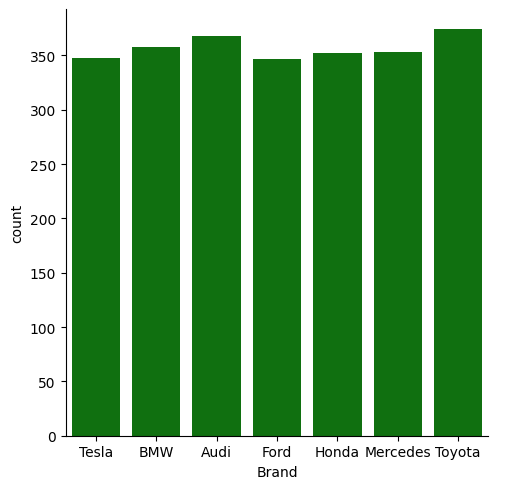

In [13]:
# number of values for each brand
sns.catplot(x='Brand', data=car_data, kind = 'count', color = 'green')


<Axes: xlabel='Brand', ylabel='Price'>

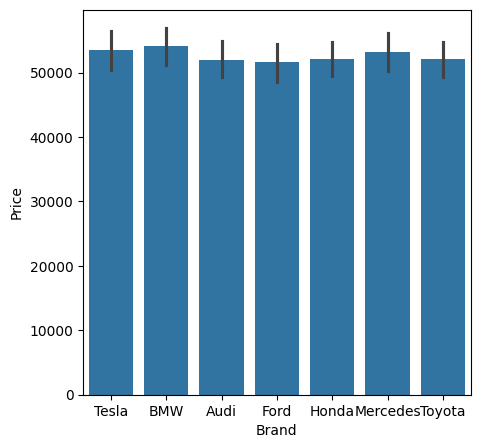

In [ ]:
# Price  vs Brand
plot = plt.figure(figsize=(5,5))
sns.barplot(x='Brand', y = 'Price', data = car_data)


<Axes: xlabel='Price', ylabel='Model'>

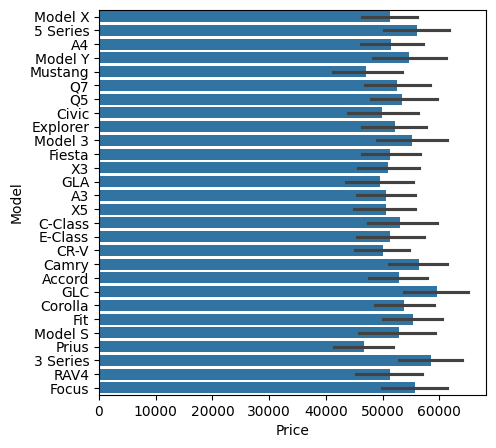

In [ ]:
# Price  vs Model
plot = plt.figure(figsize=(5,5))
sns.barplot(x='Price', y = 'Model', data = car_data)

<Axes: xlabel='Fuel_Type', ylabel='Price'>

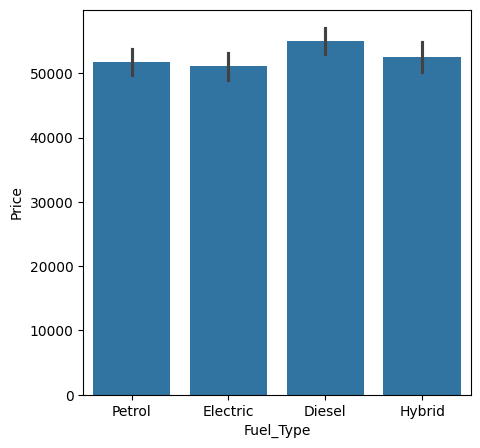

In [ ]:
# Price  vs Fuel Type
plot = plt.figure(figsize=(5,5))
sns.barplot(x='Fuel_Type', y = 'Price', data = car_data)

<Axes: xlabel='Transmission', ylabel='Price'>

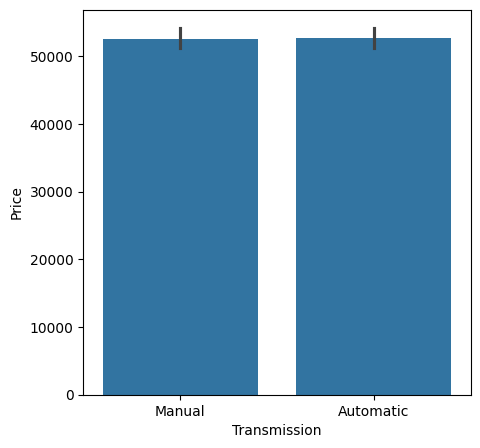

In [ ]:
# Price  vs Transmission
plot = plt.figure(figsize=(5,5))
sns.barplot(x='Transmission', y = 'Price', data = car_data)

<Axes: xlabel='Condition', ylabel='Price'>

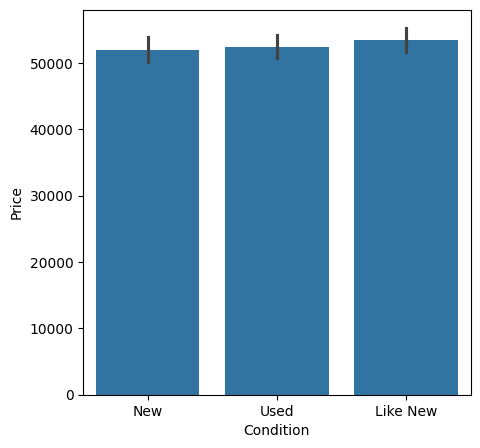

In [ ]:
# Price  vs Condition
plot = plt.figure(figsize=(5,5))
sns.barplot(x='Condition', y = 'Price', data = car_data)

In [14]:
car_data = car_data.drop(columns=['Car ID'])

In [15]:
print(car_data.Year.value_counts())

Year
2020    122
2016    118
2003    118
2022    112
2021    112
2012    111
2007    110
2002    110
2008    109
2014    109
2001    109
2018    106
2019    103
2023    103
2005    103
2011    101
2004    100
2017     97
2010     95
2013     95
2000     93
2009     90
2015     88
2006     86
Name: count, dtype: int64


***Data*** **Encoding**
```
# This is formatted as code
```



In [16]:
X = car_data.drop(columns='Price', axis=1)
Y = car_data['Price']

In [17]:
X

,Brand,Year,Engine_size,Fuel_Type,Transmission,Mileage,Condition,Model
0,Tesla,2016,2.3,Petrol,Manual,114832,New,Model X
1,BMW,2018,4.4,Electric,Manual,143190,Used,5 Series
2,Audi,2013,4.5,Electric,Manual,181601,New,A4
3,Tesla,2011,4.1,Diesel,Automatic,68682,New,Model Y
4,Ford,2009,2.6,Diesel,Manual,223009,Like New,Mustang
...,...,...,...,...,...,...,...,...
2495,Audi,2020,2.4,Petrol,Automatic,22650,Like New,Q5
2496,Audi,2001,5.7,Hybrid,Manual,77701,Like New,A3
2497,Ford,2021,1.1,Hybrid,Manual,272827,Like New,Fiesta
2498,Audi,2002,4.5,Diesel,Manual,229164,Like New,Q5


In [18]:
Y

,Price
0,26613.92
1,14679.61
2,44402.61
3,86374.33
4,73577.10
...,...
2495,61384.10
2496,24710.35
2497,29902.45
2498,46085.67


In [29]:
encoder = LabelEncoder()
X['Brand'] = encoder.fit_transform(X['Brand'])
X['Model'] = encoder.fit_transform(X['Model'])
X['Condition'] = encoder.fit_transform(X['Condition'])
X['Fuel_Type'] = encoder.fit_transform(X['Fuel_Type'])
X['Transmission']= encoder.fit_transform(X['Transmission'])

In [ ]:
X

,Brand,Year,Engine_size,Fuel_Type,Transmission,Mileage,Condition,Model
0,5,2016,2.3,3,1,114832,1,19
1,1,2018,4.4,1,1,143190,2,1
2,0,2013,4.5,1,1,181601,1,3
3,5,2011,4.1,0,0,68682,1,20
4,2,2009,2.6,0,1,223009,0,21
...,...,...,...,...,...,...,...,...
2495,0,2020,2.4,3,0,22650,0,23
2496,0,2001,5.7,2,1,77701,0,2
2497,2,2021,1.1,2,1,272827,0,12
2498,0,2002,4.5,0,1,229164,0,23


Data **Scaling**


In [20]:
scaler = MinMaxScaler()
X['Mileage']= scaler.fit_transform(X[['Mileage']])


In [21]:
X

,Brand,Year,Engine_size,Fuel_Type,Transmission,Mileage,Condition,Model
0,5,2016,2.3,3,1,0.382785,1,19
1,1,2018,4.4,1,1,0.477326,2,1
2,0,2013,4.5,1,1,0.605384,1,3
3,5,2011,4.1,0,0,0.228927,1,20
4,2,2009,2.6,0,1,0.743432,0,21
...,...,...,...,...,...,...,...,...
2495,0,2020,2.4,3,0,0.075462,0,23
2496,0,2001,5.7,2,1,0.258995,0,2
2497,2,2021,1.1,2,1,0.909519,0,12
2498,0,2002,4.5,0,1,0.763952,0,23


Splitting Data

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [36]:
X_train.shape

(2000, 8)

In [37]:
X_test.shape

(500, 8)

Model Training

In [38]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [39]:
lr_predict_train = lr.predict(X_train)
lr_predict_test = lr.predict(X_test)

In [42]:
error_score_train = metrics.r2_score(Y_train, lr_predict_train)
error_score_test = metrics.r2_score(Y_test, lr_predict_test)
print("R squared of training data:", error_score_train)
print("R squared  of testing data :", error_score_test)

R squared of training data: 0.0033185763437266758
R squared  of testing data : 0.002636147786135523


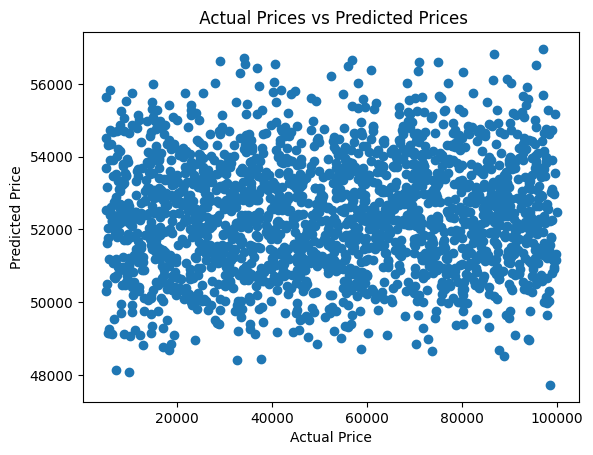

In [43]:
plt.scatter(Y_train, lr_predict_train)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

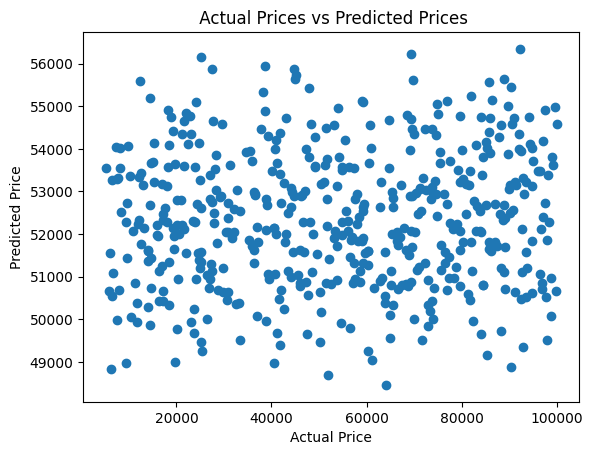

In [44]:
plt.scatter(Y_test, lr_predict_test)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [45]:
lasso_model = Lasso()
lasso_model.fit(X_train, Y_train)

Lasso()

In [48]:
lasso_model_predict_train = lasso_model.predict(X_train)
lasso_model_predict_test = lasso_model.predict(X_test)


In [49]:
error_score_train = metrics.r2_score(Y_train, lasso_model_predict_train)
error_score_test = metrics.r2_score(Y_test, lasso_model_predict_test)
print("R squared of training data:", error_score_train)
print("R squared  of testing data :", error_score_test)

R squared of training data: 0.003318550103676654
R squared  of testing data : 0.0026335350130423096


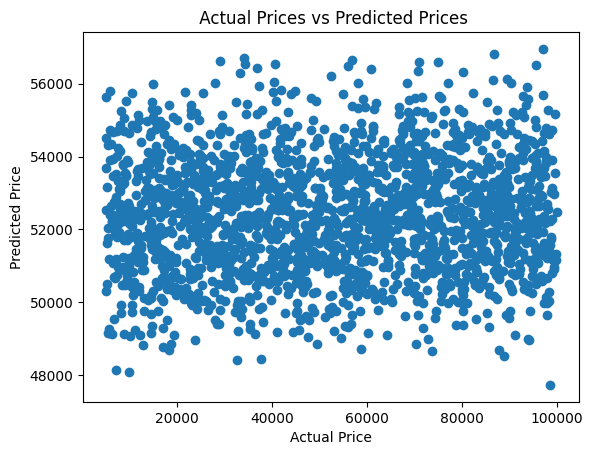

In [50]:
plt.scatter(Y_train, lasso_model_predict_train)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()


In [52]:
ridge_model = Ridge()
ridge_model.fit(X_train, Y_train)

Ridge()

In [53]:
ridge_model_predict_train = ridge_model.predict(X_train)
ridge_model_predict_test = ridge_model.predict(X_test)